DAY 05 - Mar 1, 2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
import math

import os

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"] = [10,6]

## Digit Recognizer

Another Kaggle competition: [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer/data)

The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is. 

In [3]:
input_dir = "./data/"

# Load my data
train_file = os.path.join(input_dir, "train.csv")
test_file = os.path.join(input_dir, "test.csv")

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

In [4]:
# Inspect data
dim = train.shape

print(dim)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# The features
features = train.columns[1:]
n_features = len(features)

In [6]:
# Create different data sets i.e. for training & validating
train_num = int(dim[0] * 0.8)
val_num = dim[0] - train_num

X_train, y_train = train.iloc[:train_num,1:], train.iloc[:train_num,0]
X_val, y_val = train.iloc[train_num:,1:], train.iloc[train_num:,0]


print("feature:", n_features)
print("train:", train_num)
print("valid:", val_num)

feature: 784
train: 33600
valid: 8400


### Random Forest Classfier

Reference: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit

### How many trees? 

Here we train on `n = 10,20,30,...100` trees 

In [7]:
n_trees = range(10,101,10)

rfc = {}
acc = {}
for n in n_trees:
    print("N =", n, "...")
    rfc[n] = RandomForestClassifier(n_estimators = n)
    rfc[n].fit(X_train, y_train)

    acc[n] = sum(rfc[n].predict(X_val)==y_val)/len(y_val) 

N = 10 ...
N = 20 ...
N = 30 ...
N = 40 ...
N = 50 ...
N = 60 ...
N = 70 ...
N = 80 ...
N = 90 ...
N = 100 ...


In [8]:
df_acc = pd.DataFrame(acc, index=["accuracy"]).transpose()
df_acc["num_trees"] = df_acc.index
df_acc

,accuracy,num_trees
10,0.939524,10
20,0.954167,20
30,0.960238,30
40,0.962262,40
50,0.963333,50
60,0.964286,60
70,0.963571,70
80,0.965833,80
90,0.965595,90
100,0.967262,100


Difference in accuracy is not that great from 30 - 100 trees. We next show the same data in a figure.

(0.9, 1)

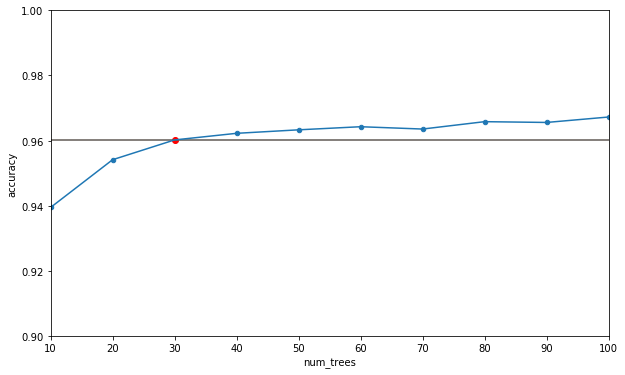

In [9]:
ax = df_acc.plot(legend=False)
df_acc.plot.scatter(x="num_trees", y="accuracy", legend=False, ax=ax)


n_tree = 30
plt.scatter(x=[n_tree], y=[acc[n_tree]], color="red")
plt.hlines(acc[n_tree], xmin=10,xmax=100, color="#5E5852")
plt.xlim(10,100)
plt.ylim(.9, 1)

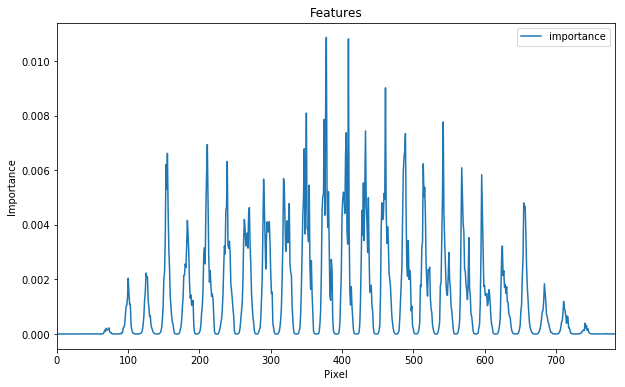

In [10]:
pd.DataFrame({
    "feature":train.columns[1:],
    "importance":rfc[n].feature_importances_
}).plot()

plt.title('Features')
plt.xlabel('Pixel')
plt.ylabel('Importance')

### Evaluation

In [11]:
# Predictions with 30 trees
test_yhat = rfc[30].predict(test)

In [12]:
pd.DataFrame({"ImageId":test.index+1, "Label":test_yhat}).to_csv("digitrecognizer-rf_submission.csv", index=False)

!head digitrecognizer-rf_submission.csv

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0


Public score of "0.95871"